# 알고리즘 구분용 용어
- ensemble : 정형 데이터를 다루는데에 있어서 가장 좋은 알고리즘으로 불린다. 

ensemble에 해당하는 방식들
- bagging 
- boosting

#### ensemble
- 합창, 협주 -> 1인 x, **여럿이서 진행**
- 대부분 Decision Tree 기반으로 만들어짐
- 최종 결과를 도출할 때, n개의 알고리즘 결과값을 이용하는 방법
- ex) 회귀 : n개의 알고리즘 결과값들을 평균
- ex) 분류 : n개의 알고리즘 결과값들을 투표
- 대표적인 알고리즘 : RandomForest, Extra Tree, Gradient Boosting

#### bagging
- bootstrap + aggregation + ing
- bootstrap으로 도출한 여러 개의 결과를 합산
- bootstrap으로 서로 조금씩 다른 데이터 셋 n개 만들고, n개의 데이터셋에 대해 학습을 진행(조금씩 다르게 학습됨)
- -> n개의 학습된 예측결과를 합산

#### boosting ( 점수를 극대화하고 싶다 )
- 이전 모델의 오차를 보완하는 방향으로 만들어진다. -> 정형 데이터 기준으로 가장 정확도가 높은 알고리즘( 잘 사용했을 때 )
- 부스팅 모델의 단점 : 속도가 느리다. 이전 모델에 의존적이다. 내부 계산이 복잡하다
- 대충 사용하면 randomforest보다 성능이 안좋음. -> tuning

### 분류 문제의 평가지표
- 혼동행렬 개념 도입
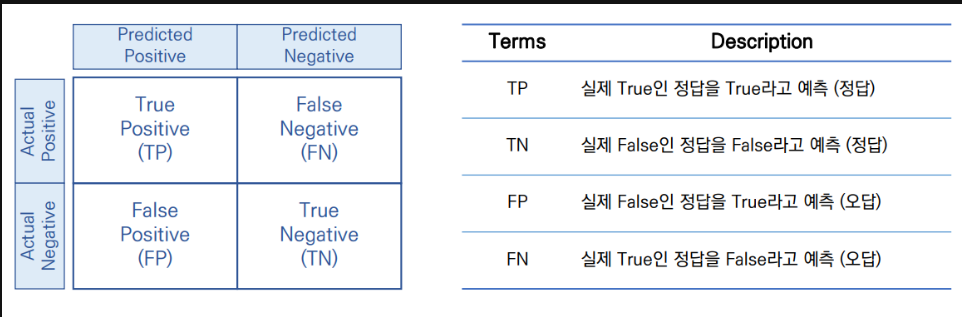

In [1]:
import pandas as pd

df = pd.read_csv("test2_modify")
df.describe().columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'day_stay',
       'Local_proposition', 'Country_Ratio', 'car_yes', 'diff'],
      dtype='object')

In [2]:
label = 'IsCanceled'
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
    'TotalOfSpecialRequests', 'day_stay',
       'Local_proposition', 'Country_Ratio', 'car_yes', 'diff']

train, test = df[0::2], df[1 :: 2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [3]:
from sklearn.tree import DecisionTreeClassifier as dt

In [4]:
model = dt(max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [5]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [6]:
y_test

0        0
1        0
2        1
3        0
4        0
        ..
19793    0
19794    0
19795    0
19796    0
19797    0
Name: IsCanceled, Length: 19798, dtype: int64

In [7]:
for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(X_test)
for_plot['actual'] = y_test
for_plot

,predict,actual
0,0,0
1,0,0
2,1,1
3,1,0
4,1,0
...,...,...
19793,0,0
19794,0,0
19795,0,0
19796,0,0


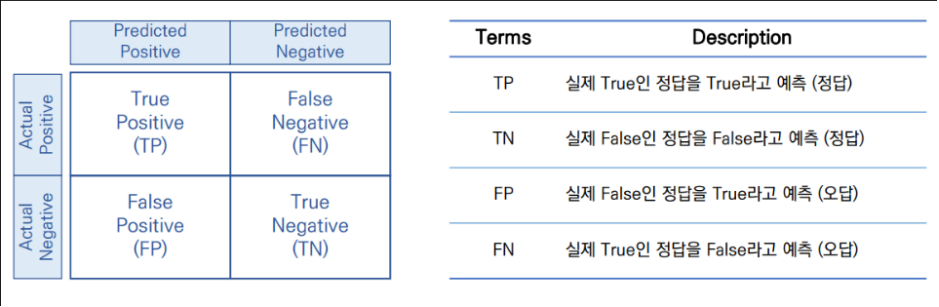
#### accuracy
- 전체 중에 맞춘 비율
- 정확도 = 예측결과와 실제 값이 맞은 건 수 / 전체 데이터 수
- acc = (TP + TN) / (TP + TN + FN + FP)

#### precision
- 모델이 T라고 분류한 것 중에서 실제 T인 것의 비율
- prec = TP / (TP + FP)

#### recall
- 실제 T인 것 중에서 모델이 T라고 예측한 것의 비율
- recall = TP / (TP + FN)
- sensitivity, hit rate
- TPR( True Positive Rate ) 


- precision 과 recall은 바라보는 관점에서 차이가 있다. 



#### precision/ recall 차이점
- 화재경보 ( 불이 난 경우 : 1, 안 난 겨우 : 0 )
- FP  
- FN  
- 경중의 차이가 크다. 

- 스팸메일 분류 ( 스팸메일 : 1, 아닌 경우 : 0 ) 
- FP

- 게임 어뷰저 분류( 어뷰저인 경우 : 1, 아닌 경우 : 0 )
- FP : 어뷰저라고 판단했는데 어뷰저가 아닌데 억울한 사람이 생긴다.
- FN : 어뷰저라고 판단을 안 했는데 어뷰저다. 
- 애매한 부분이 생긴다. 

In [8]:
from sklearn.metrics import confusion_matrix as cm

In [9]:
TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()
print(TN, FP, FN, TP)

13424 849 2490 3035


In [10]:
acc = (TP + TN) / (TP + TN + FN + FP)
acc

0.831346600666734

In [11]:
prec = TP / (TP + FP)
prec

0.7814109165808445

In [12]:
recall = TP / (TP + FN)
recall

0.5493212669683258

#### 언제 accuracy 대신 precision과 recall 등이 고려될까?
- class imbalance issue가 발생했을 때 accuracy의 의미가 떨어진다.

#### ROC Curve
- AUC(Area Under Curve)

In [13]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb

In [14]:
m1, m2, m3 = dt(), rf(), gb()
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

GradientBoostingClassifier()

In [15]:
m2.predict_proba(X_test)

array([[0.85 , 0.15 ],
       [0.84 , 0.16 ],
       [0.322, 0.678],
       ...,
       [0.99 , 0.01 ],
       [0.85 , 0.15 ],
       [0.8  , 0.2  ]])

In [16]:
m1.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [17]:
r1 = pd.DataFrame(m1.predict_proba(X_test), columns = ['neg', 'pos'])
r2 = pd.DataFrame(m2.predict_proba(X_test), columns = ['neg', 'pos'])
r3 = pd.DataFrame(m3.predict_proba(X_test), columns = ['neg', 'pos'])

In [18]:
r3

,neg,pos
0,0.494244,0.505756
1,0.816796,0.183204
2,0.288396,0.711604
3,0.370010,0.629990
4,0.361432,0.638568
...,...,...
19793,0.605018,0.394982
19794,0.605018,0.394982
19795,0.551790,0.448210
19796,0.551790,0.448210


In [19]:
from sklearn.metrics import roc_curve

In [20]:
x1, y1, _ = roc_curve(y_test, r1['pos'])
x2, y2, _ = roc_curve(y_test, r2['pos'])
x3, y3, _ = roc_curve(y_test, r3['pos'])

In [21]:
import matplotlib.pyplot as plt

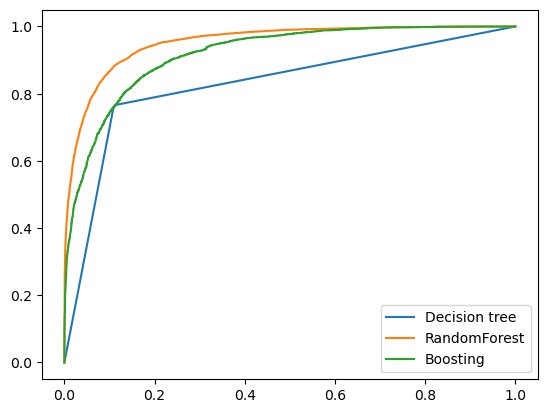

In [22]:
# ROC Curve

plt.plot(x1, y1, label = 'Decision tree')
plt.plot(x2, y2, label = 'RandomForest')
plt.plot(x3, y3, label = 'Boosting')
plt.legend()